In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

In [3]:
df = pd.read_csv('../03-classification/bank/bank-full.csv', delimiter=';')
df.shape

(45211, 17)

In [4]:
useful_columns =  ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [5]:
df = df[useful_columns]
df.shape

(45211, 15)

In [6]:
df.y = (df.y == 'yes').astype(int)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df.shape, df_train.shape, df_val.shape, df_test.shape

((45211, 15), (27126, 15), (9042, 15), (9043, 15))

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
len(y_train), len(y_val), len(y_test)

(27126, 9042, 9043)

In [13]:
del df_train['y']
del df_val['y']
del df_test['y']
df.shape, df_train.shape, df_val.shape, df_test.shape

((45211, 15), (27126, 14), (9042, 14), (9043, 14))

In [14]:
# 1.ROC AUC feature importance

In [15]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [16]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
len(numerical)

7

In [17]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
len(categorical)

7

In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
df_train['age'].values

array([56, 33, 32, ..., 52, 32, 38])

In [20]:
for num_feature in numerical:
    auc = roc_auc_score(y_train, df_train[num_feature].values)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[num_feature].values)
    print (num_feature, auc)

age 0.512185717527344
balance 0.5888313805382317
day 0.525957882383908
duration 0.8147002759670778
campaign 0.5714543015682159
pdays 0.5901276247352144
previous 0.5985653242764153


Duration feature has the highest ROC - AUC

In [21]:
# 2. Training the model
from sklearn.feature_extraction import DictVectorizer

In [22]:
dv = DictVectorizer(sparse=False)

In [23]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

In [24]:
X_train = dv.fit_transform(train_dicts)

In [25]:
X_val = dv.transform(val_dicts)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
y_pred = model.predict_proba(X_val)[:,1]

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_val, y_pred >= 0.5)

0.898252598982526

In [31]:
from sklearn.metrics import roc_curve

In [32]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

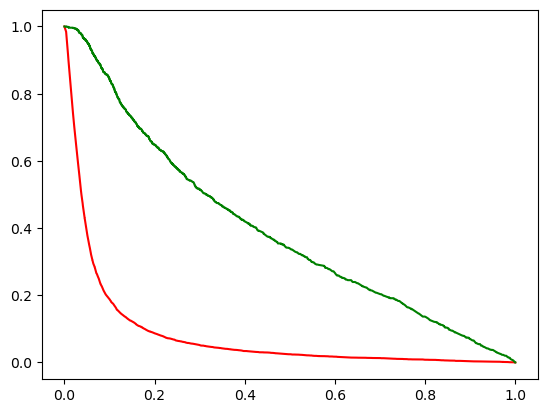

In [33]:
plt.plot(thresholds, fpr, color='red')
plt.plot(thresholds, tpr, color='green')
plt.show()

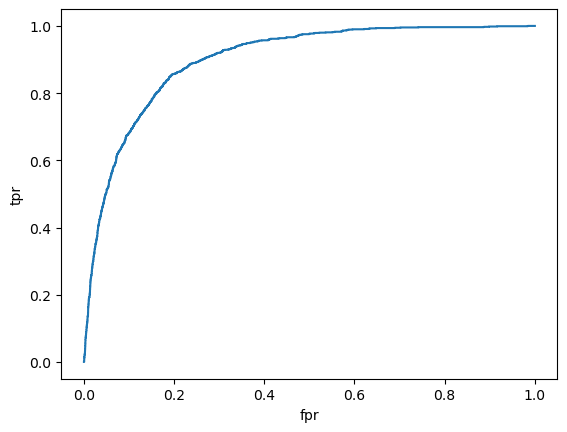

In [34]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc_score(y_val, y_pred).round(3)

0.9

AUC of this model on the validation dataset is 0.9

In [37]:
# 3. Precision and Recall
thresholds = np.arange(0.0, 1.0, 0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [38]:
precisions = []
recalls = []
from sklearn.metrics import precision_score, recall_score
for threshold in thresholds:
    y_pred_dec = y_pred >= threshold
    
    precision = precision_score(y_val, y_pred_dec)
    recall = recall_score(y_val, y_pred_dec)
    
    precisions = np.append(precisions, precision)
    recalls = np.append(recalls, recall)
len(thresholds), len(precisions), len(recalls)

(100, 100, 100)

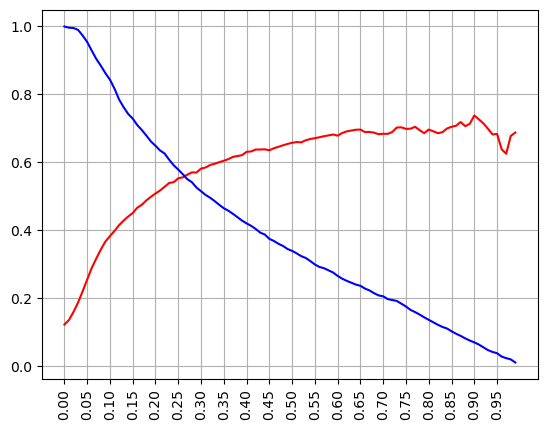

In [39]:
plt.plot(thresholds, precisions, color = 'red', label='precision')
plt.plot(thresholds, recalls, color = 'blue', label='recall')
plt.xticks(np.arange(0, 1, 0.05), rotation='vertical')
plt.grid()
plt.show()
# Precision and recall meet at aroung 0.265

In [40]:
# 4. F1 score
f1_scores = {}
from sklearn.metrics import f1_score
for threshold in thresholds:
    f1_scores[threshold] = f1_score(y_val, y_pred >= threshold)
f1_scores

{0.0: 0.2165680473372781,
 0.01: 0.23811078463380128,
 0.02: 0.27407221664994985,
 0.03: 0.3137537884254582,
 0.04: 0.3584842387659289,
 0.05: 0.4014556598352806,
 0.06: 0.440224428139836,
 0.07: 0.4686172722982539,
 0.08: 0.494147582697201,
 0.09: 0.5141150922909881,
 0.1: 0.5261363636363636,
 0.11: 0.5347242921013413,
 0.12: 0.5426502990242367,
 0.13: 0.5481335952848723,
 0.14: 0.5525423728813559,
 0.15: 0.5565217391304348,
 0.16: 0.5624548736462094,
 0.17: 0.5641404805914972,
 0.18: 0.5674028941355674,
 0.19: 0.5682974559686889,
 0.2: 0.5696,
 0.21: 0.5696771557008582,
 0.22: 0.5725,
 0.23: 0.5710616438356164,
 0.24: 0.565084893339138,
 0.25: 0.5651980418335558,
 0.26: 0.5600722673893406,
 0.27: 0.5566820276497696,
 0.28: 0.5551401869158878,
 0.29: 0.5466603505447655,
 0.3: 0.5458937198067633,
 0.31: 0.541095890410959,
 0.32: 0.5394149727317799,
 0.33: 0.5348720521826392,
 0.34: 0.5300101729399797,
 0.35000000000000003: 0.525231719876416,
 0.36: 0.522372528616025,
 0.37: 0.518713758

In [41]:
f1_scores_df = pd.DataFrame(pd.Series(f1_scores, name='f1_score'))
f1_scores_df.f1_score.max(), f1_scores_df.f1_score.idxmax()

(0.5725, 0.22)

Threshold 0.22 has maximum value for F1_score

In [63]:
# 5. 5-Fold CV
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model 

In [53]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred 

In [54]:
from sklearn.model_selection import KFold

In [55]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [56]:
!pip install tqdm

In [57]:
from tqdm.auto import tqdm

In [59]:
scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y
    y_val = df_val.y

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)

    scores.append(auc)
scores

0it [00:00, ?it/s]

[0.8994003368177808,
 0.8990191748136478,
 0.9113003418849925,
 0.9082173454084963,
 0.9121719906620764]

In [61]:
np.std(scores).round(3)

0.006

standard deviation of the scores across 5 different folds is 0.006

In [62]:
# 6 Hyperparameter Tuning

In [ ]:
for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.y
        y_val = df_val.y
    
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append(auc)
    print (f'${C} -> Mean ${np.mean(scores).round(3)}, STD ${np.std(scores).round(3)}')

0it [00:00, ?it/s]

$1e-06 -> Mean $0.701, STD $0.009


0it [00:00, ?it/s]

$0.001 -> Mean $0.861, STD $0.007


0it [00:00, ?it/s]